In [2]:
import pandas as pd

# Load main dataset
try:
    zomato = pd.read_csv("/content/zomato.csv", encoding='utf-8')
except UnicodeDecodeError:
    zomato = pd.read_csv("/content/zomato.csv", encoding='latin-1')


# Load country mapping
country = pd.read_excel("/content/Country-Code.xlsx")

# Merge on Country Code
zomato = pd.merge(zomato, country, on="Country Code", how="left")

print(zomato.head())
print(zomato.info())

   Restaurant ID         Restaurant Name  Country Code              City  \
0        6317637        Le Petit Souffle           162       Makati City   
1        6304287        Izakaya Kikufuji           162       Makati City   
2        6300002  Heat - Edsa Shangri-La           162  Mandaluyong City   
3        6318506                    Ooma           162  Mandaluyong City   
4        6314302             Sambo Kojin           162  Mandaluyong City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2  Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3  Third Floor, Mega Fashion Hall, SM Megamall, O...   
4  Third Floor, Mega Atrium, SM Megamall, Ortigas...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   
2  Edsa Shangri-La, Ortigas, Mandaluyong City   
3      SM 

In [5]:
# Drop duplicates
zomato.drop_duplicates(inplace=True)

# Drop rows with missing essential values
zomato = zomato.dropna(subset=['Cuisines', 'Aggregate rating'])

# Reset index
zomato.reset_index(drop=True, inplace=True)

print("Shape after cleaning:", zomato.shape)


Shape after cleaning: (9542, 23)


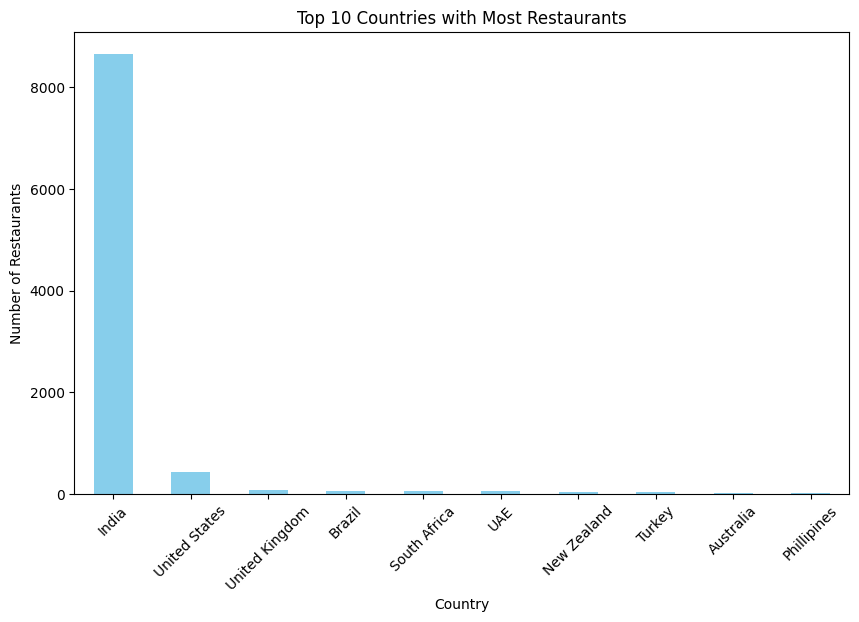

In [7]:
import matplotlib.pyplot as plt

country_counts = zomato['Country_y'].value_counts().head(10)

plt.figure(figsize=(10,6))
country_counts.plot(kind='bar', color='skyblue')
plt.title("Top 10 Countries with Most Restaurants")
plt.xlabel("Country")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=45)
plt.show()

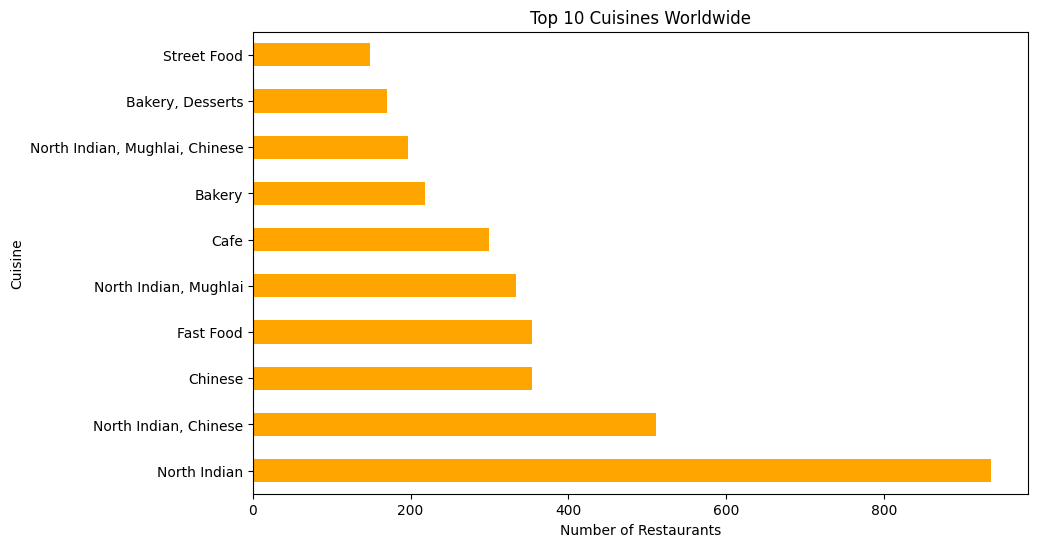

In [8]:
cuisine_counts = zomato['Cuisines'].value_counts().head(10)

plt.figure(figsize=(10,6))
cuisine_counts.plot(kind='barh', color='orange')
plt.title("Top 10 Cuisines Worldwide")
plt.xlabel("Number of Restaurants")
plt.ylabel("Cuisine")
plt.show()


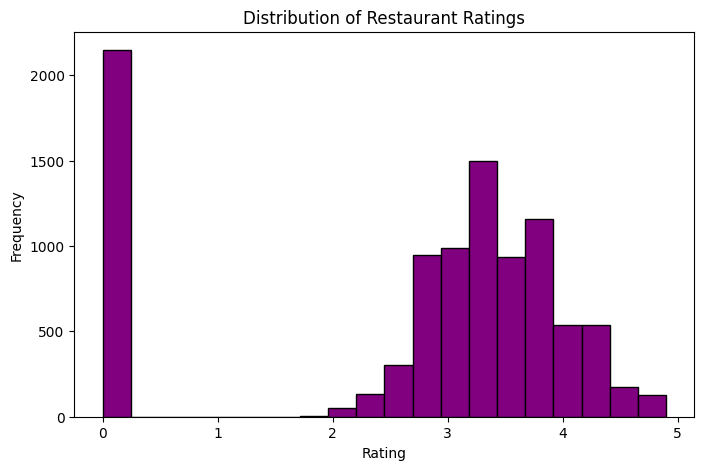

In [9]:
plt.figure(figsize=(8,5))
plt.hist(zomato['Aggregate rating'], bins=20, color='purple', edgecolor='black')
plt.title("Distribution of Restaurant Ratings")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.show()


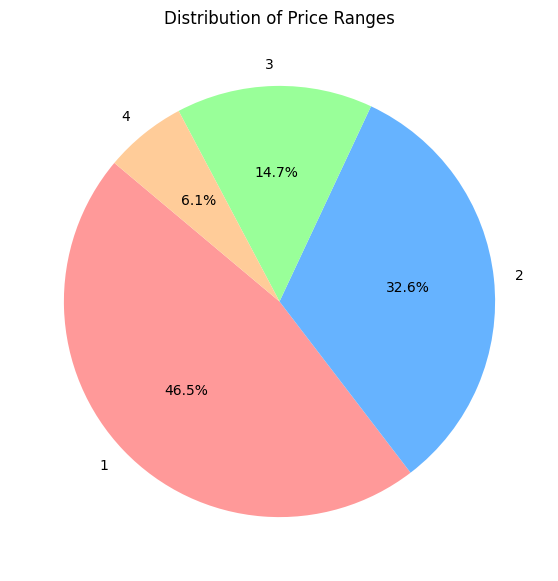

In [12]:
# -----------------------
# Pie Chart of Price Range
# -----------------------
# st.subheader("Price Range Distribution") # Removed Streamlit subheader
price_range = zomato['Price range'].value_counts()

fig4, ax4 = plt.subplots(figsize=(7,7))
price_range.plot(kind='pie', autopct='%1.1f%%', startangle=140,
                 colors=['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0'], ax=ax4)
ax4.set_ylabel("")
ax4.set_title("Distribution of Price Ranges")
plt.show() # Changed st.pyplot to plt.show() to display the plot in Colab

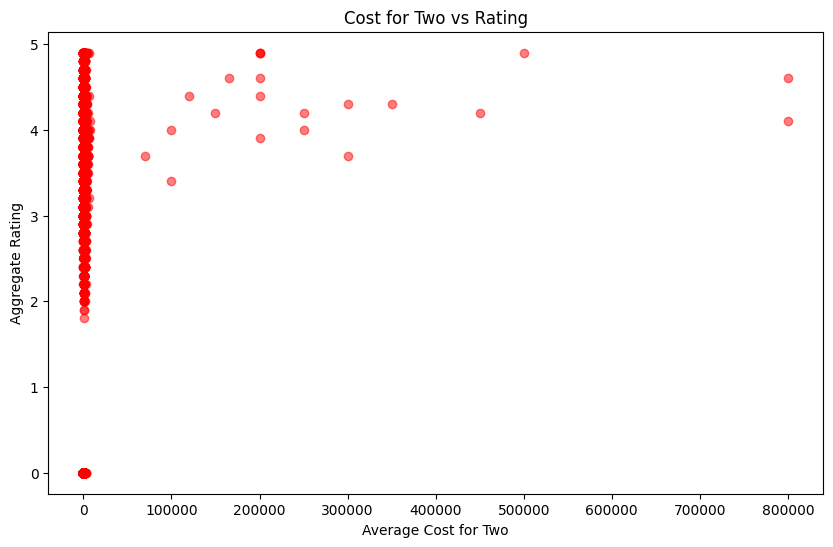

In [13]:
plt.figure(figsize=(10,6))
plt.scatter(zomato['Average Cost for two'], zomato['Aggregate rating'], alpha=0.5, color='red')
plt.title("Cost for Two vs Rating")
plt.xlabel("Average Cost for Two")
plt.ylabel("Aggregate Rating")
plt.show()


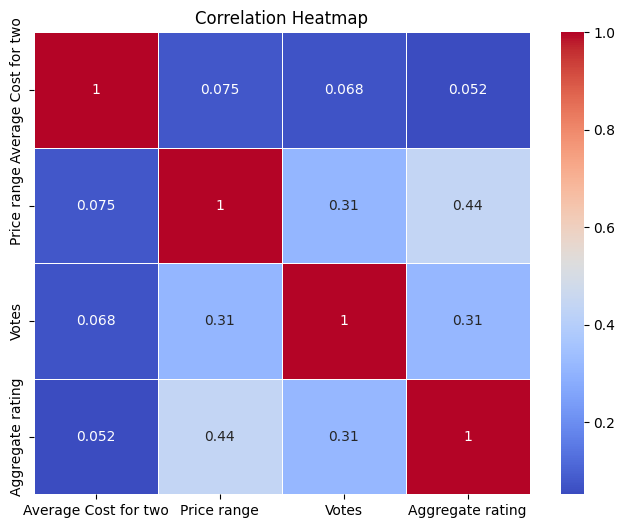

In [14]:
import seaborn as sns

plt.figure(figsize=(8,6))
corr = zomato[['Average Cost for two','Price range','Votes','Aggregate rating']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
